In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Agenda



*   How to implement MLP model in Keras
*   Basic Model Tuning





# Multi Layers Perceptron


**A Linear Model**

![Linear Model](https://developers.google.com/machine-learning/crash-course/images/linear_net.svg)

**One Hidden Layer**

<img width="500px" height="300px" src="https://i.imgur.com/BF1GNbP.png" />

Can you count the number of parameters for the above model ?

Check your answer in the cell below (Using keras model.summary function)




In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

test_model = Sequential()
test_model.add(Input(shape=(4,), name='input_layer'))
test_model.add(Dense(5, activation='relu', name='hidden_layer_1'))

# If this is a binary classification (2 classes) problem
test_model.add(Dense(1, activation='sigmoid', name='output_layer'))

# If this is a multi-class classification problem
#NUM_CLASSES = 3
#test_model.add(Dense(NUM_CLASSES, activation='softmax', name='output_layer')) # multiclass 3 must use softmax

# If this is a regression problem (output is a number)
#test_model.add(Dense(1, activation='linear', name='output_layer')) # linear's identity (w*x + b) 

# 1. Call the summary() function of model
test_model.summary() 

# 4 * 5 + 5 = 25 --> 25 + 6 = 31

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 5)                 25        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 6         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


![alt text](https://i.imgur.com/VQmgaRP.png)

Keras implement for a Deep Learning Neural Network

In [ ]:
test_model = Sequential()
test_model.add(Dense(7, activation='relu', name='hidden_layer_1', input_shape=(5,)))
test_model.add(Dense(7, activation='relu', name='hidden_layer_2'))
test_model.add(Dense(7, activation='relu', name='hidden_layer_3'))
test_model.add(Dense(7, activation='relu', name='hidden_layer_4'))
test_model.add(Dense(4, activation='softmax', name='output_layer'))
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 7)                 42        
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 7)                 56        
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 7)                 56        
_________________________________________________________________
hidden_layer_4 (Dense)       (None, 7)                 56        
_________________________________________________________________
output_layer (Dense)         (None, 4)                 32        
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


# Part 1: Neural network for a spiral dataset

Using Neural Network and Softmax Regression for a classification problem

## Load Dataset

In [ ]:
import math
import numpy as np
np.random.seed(1612)

from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

def generate_data():
  N = 5000 # number of points per class
  d0 = 2 # dimensionality
  C = 3 # number of classes
  X = np.zeros((d0, N*C)) # data matrix (each row = single example)
  y = np.zeros(N*C, dtype='uint8') # class labels

  for j in range(C):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N) # radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
    X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j
  X = X.T
  Y = to_categorical(y, 3)
  return X, y, Y

Use the generate_data() function above to load data

In [ ]:
# TODO:
# 1. Call the generate_data() function above
X, y, Y = generate_data()

In [ ]:
print(X)

[[ 0.00000000e+00  0.00000000e+00]
 [-6.75073863e-06  1.99926067e-04]
 [ 8.52530518e-05  3.90891208e-04]
 ...
 [-5.64568490e-01  8.24901461e-01]
 [-5.80468330e-01  8.14037148e-01]
 [-5.97023097e-01  8.02224047e-01]]


In [ ]:
print(y)

[0 0 0 ... 2 2 2]


In [ ]:
print(Y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


## Visualize data

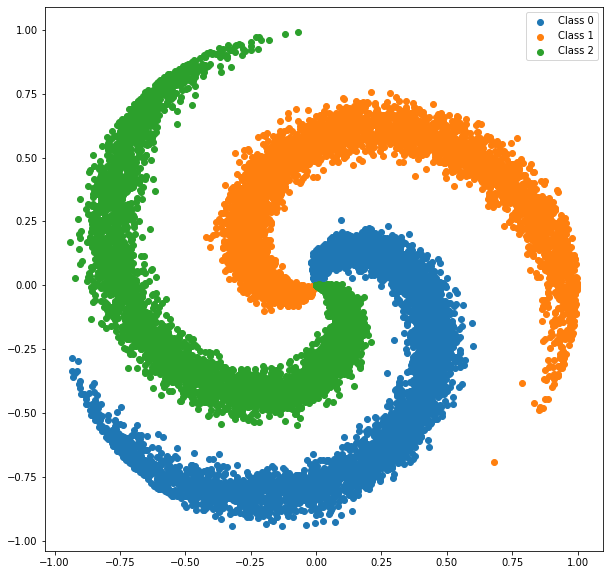

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X[np.where(y==0)[0]][:,0], X[np.where(y==0)[0]][:,1])
plt.scatter(X[np.where(y==1)[0]][:,0], X[np.where(y==1)[0]][:,1])
plt.scatter(X[np.where(y==2)[0]][:,0], X[np.where(y==2)[0]][:,1])
plt.legend(['Class 0', 'Class 1', 'Class 2'])
plt.show()

## Define and train model

Helper function for Training and Drawing chart

In [ ]:
def draw_chart(loss, acc):
  epochs = range(len(loss))

  plt.figure(figsize=(20,10))
  plt.subplot(1,2,1) # Define a space with 1 row 2 columns and plot chart at po
  plt.plot(epochs, loss, c='red')
  plt.title('Loss versus Epochs')

  plt.subplot(1,2,2)
  plt.plot(epochs, acc)
  plt.title('Accuracy versus Epochs')

def train_model(model, epochs):
  history = model.fit(X, Y, epochs=epochs, verbose=0) # để vẽ loss, acc thì phải tạo biến history
  print(model.evaluate(X, Y))  
  loss.extend(history.history['loss']) # lấy array từ history nhét vào loss=[]
  acc.extend(history.history['accuracy']) # lấy array từ history nhét vào acc=[]

In [ ]:
X.shape

(15000, 2)

In [ ]:
Y.shape

(15000, 3)

Define a Neural Network with Softmax at output layer then compile it

In [ ]:
loss = [] # array to store model loss history
acc = [] # array to store model accuracy history

spiral_model = Sequential() 

# 1. Add Dense layer with 4 units, relu activation to spiral_model (noted: input_shape)
# 2. Add Dense layer with softmax activation
# 3. Compile model
# Try to change Dense 4 to increase layers, then compile with epoch from low to high until when the epoch is low and the performance is > 90% or as expected, then stop.
spiral_model.add(Dense(16, activation='relu', name='hidden_layer_1', input_shape=(2,))) # (2,) = X.shape[1:]
spiral_model.add(Dense(3, activation='softmax', name='output_layer')) # Dense 3 output (3 colors)
spiral_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy') # compile to create a new model to train. If the new one fits then use the old one to train.
spiral_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 16)                48        
_________________________________________________________________
output_layer (Dense)         (None, 3)                 51        
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


Call train_model() and draw_chart() to train and visualize model performance

469/469 [==============================] - 1s 1ms/step - loss: 0.0349 - accuracy: 0.9947
[0.03485402464866638, 0.9947333335876465]


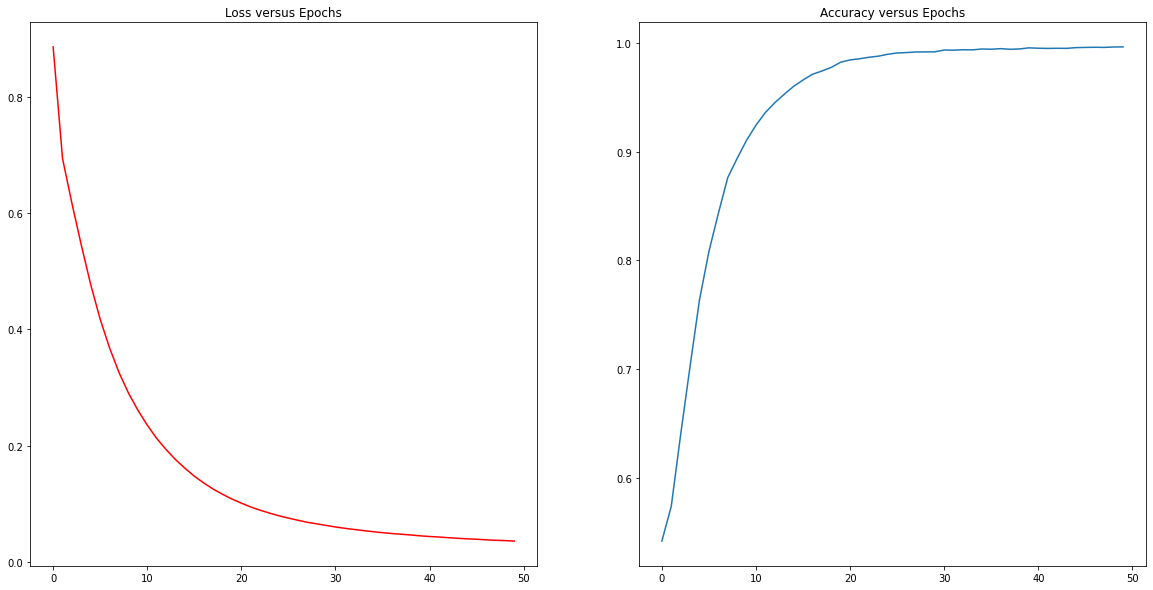

In [ ]:
# TODO
# 1. Call train_model()
# 2. Call draw_chart()
train_model(spiral_model, epochs=50)
draw_chart(loss, acc)

469/469 [==============================] - 1s 1ms/step - loss: 0.0143 - accuracy: 0.9969
[0.01433532778173685, 0.9968666434288025]


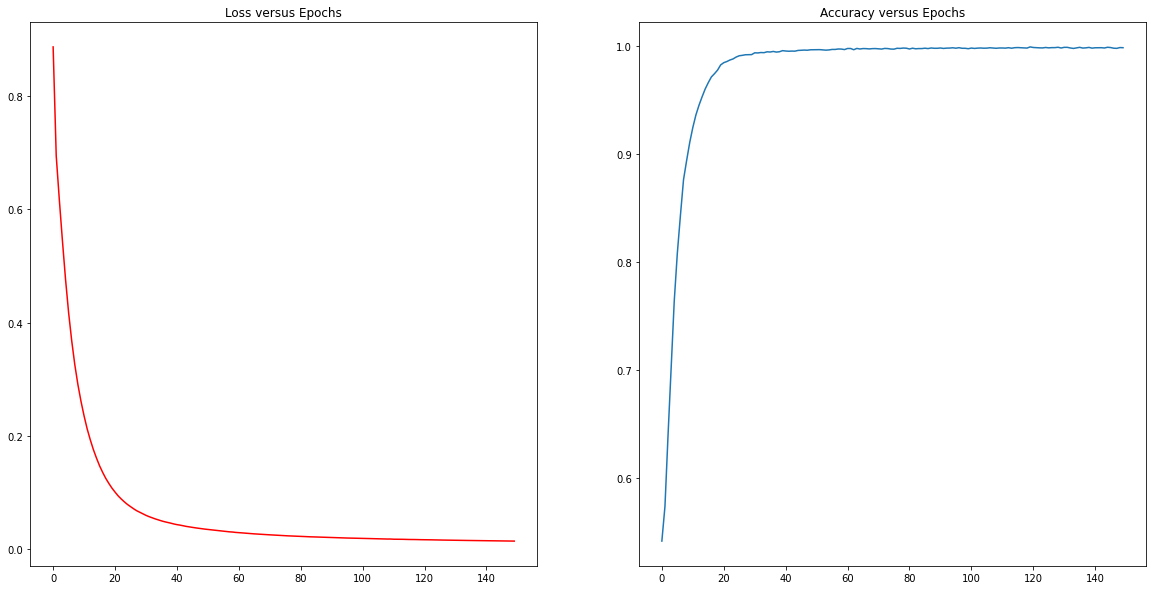

In [ ]:
train_model(spiral_model, epochs=100)
draw_chart(loss, acc)

## Plot Decision Boundary

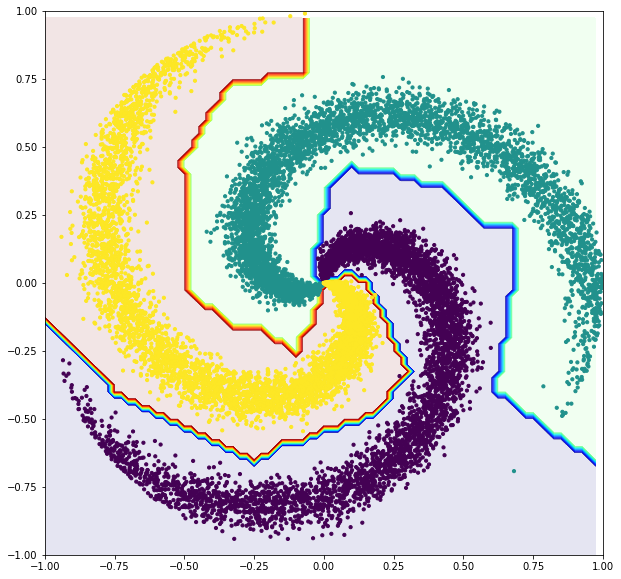

In [ ]:
plt.figure(figsize=(10,10))
xm = np.arange(-1, 1, 0.025)
xlen = len(xm)
ym = np.arange(-1, 1, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

X0 = np.vstack((xx1, yy1)).T

Y_hat = spiral_model.predict(X0)

Z = np.argmax(Y_hat, axis=1)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha=.1)

plt.scatter(X[:,0], X[:,1], c=y, s=10)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

# Excercise 2: Deep Neural Network and Basic Tuning

In [ ]:
%reset -f

Apply DNN on Mnist Fashion dataset


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#['Áo thun', 'Quần dài', 'Áo liền quần', 'Đầm', 'Áo khoác',
#               'Sandal', 'Áo sơ mi', 'Giày', 'Túi xách', 'Ủng']

## Import libraries

In [ ]:
import numpy as np
np.random.seed(1612)
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten, Input  # Flattern is quite similar to Reshape but can integrate with Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.random import set_seed
import matplotlib.pyplot as plt 

New Keras's layer: **Flatten**

Usage: Use when you need to **flat out a matrix into a vector**

Example: **Matrix X** with shape (3x3) will become a **vector x** with shape (9x1)

## Load and preprocess dataset

Image data can be:


1.   int array with values from range [0, 255]
2.   float array with values from range [0, 1]



**How to apply scaling for image data**

Since pixel values can be negative, you can not apply Standard Scaler.

The most famous scaler for image data called MinMaxScaler ([Read more](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02))

$X = \frac{X - min(X)}{max(X) - min(X)}$

Apply this to image data:

$img = \frac{img}{ 255}$

In [ ]:
def load_and_preprocess_data():
  (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
  # TODO:
  # 1. Convert X_train, X_test to float
  # 2. Apply scaling on X_train, X_test
  # 3. Apply one hot encoding to y_train, y_test

  X_train = X_train.astype(np.float32)
  X_test = X_test.astype(np.float32)
  X_train = X_train / 255
  X_test = X_test / 255
  Y_train = to_categorical(y_train, 10) # 10 = num_class
  Y_test = to_categorical(y_test, 10)
  return X_train, Y_train, X_test, Y_test

In [ ]:
X_train, Y_train, X_test, Y_test = load_and_preprocess_data()
print('Shape of X train:', X_train.shape)
print('Shape of Y train:', Y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of Y test:', Y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
Shape of X train: (60000, 28, 28)
Shape of Y train: (60000, 10)
Shape of X test: (10000, 28, 28)
Shape of Y test: (10000, 10)


## Visualize Data

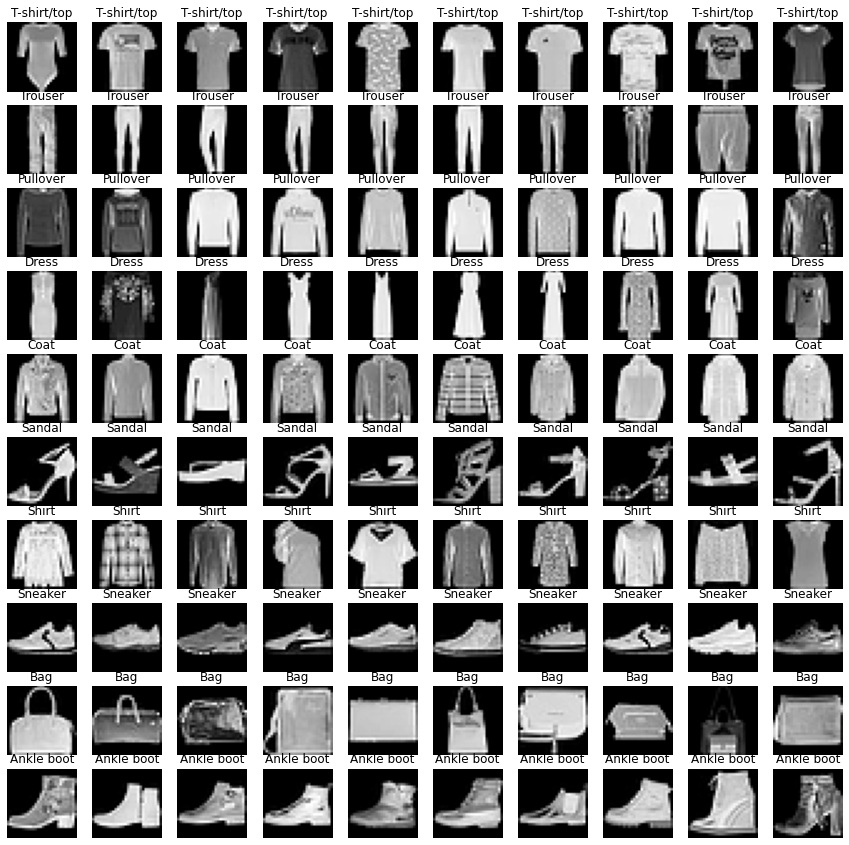

In [ ]:
fig, axs = plt.subplots(10,10)
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(10):
  for j in range(10):
    target = np.random.choice(np.where(np.argmax(Y_train, axis=1) == i)[0])
    axs[i][j].grid('off')
    axs[i][j].axis('off')
    axs[i][j].imshow(np.squeeze(X_train[target]), cmap='gray')
    axs[i][j].set_title(class_names[i])

## Define Deep Neural Network model

In [ ]:
loss = []
acc = []
# TODO:
# 1. Do whatever you want here
# 2. Compile model
model = Sequential()

# Cứ thử thay Dense 4 thì tăng lên rồi compile có epoch thấp tới cao cho tới khi số epoch thấp mà > 90% or performance như mong muốn là đc
model.add(Flatten(input_shape=X_train.shape[1:])) # 28x28 --> 
model.add(Dense(64, activation='relu', name='hidden_layer_1'))
model.add(Dense(64, activation='relu', name='hidden_layer_2'))
# model.add(Dense(16, activation='relu', name='hidden_layer_3'))
# model.add(Dense(16, activation='relu', name='hidden_layer_4'))
model.add(Dense(10, activation='softmax', name='output_layer')) # multiclass
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy') # compile tạo model mới để train. Nếu chí có fit thì lấy lại cũ để train
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 64)                50240     
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 64)                4160      
_________________________________________________________________
output_layer (Dense)         (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def draw_chart(loss, acc):
  epochs = range(len(loss))

  plt.figure(figsize=(20,10))
  plt.subplot(1,2,1) # Define a space with 1 row 2 columns and plot chart at po
  plt.plot(epochs, loss, c='red')
  plt.title('Loss versus Epochs')

  plt.subplot(1,2,2)
  plt.plot(epochs, acc)
  plt.title('Accuracy versus Epochs')

def train_model(model, epochs):
  history = model.fit(X_train, Y_train, epochs=epochs, verbose=0) # lớn hơn thì tắt verbose rồi evaluate # https://stackoverflow.com/questions/47902295/what-is-the-use-of-verbose-in-keras-while-validating-the-model
  print(model.evaluate(X_train, Y_train))  
  loss.extend(history.history['loss'])
  acc.extend(history.history['accuracy'])

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2628 - accuracy: 0.9009
[0.2627650201320648, 0.900866687297821]


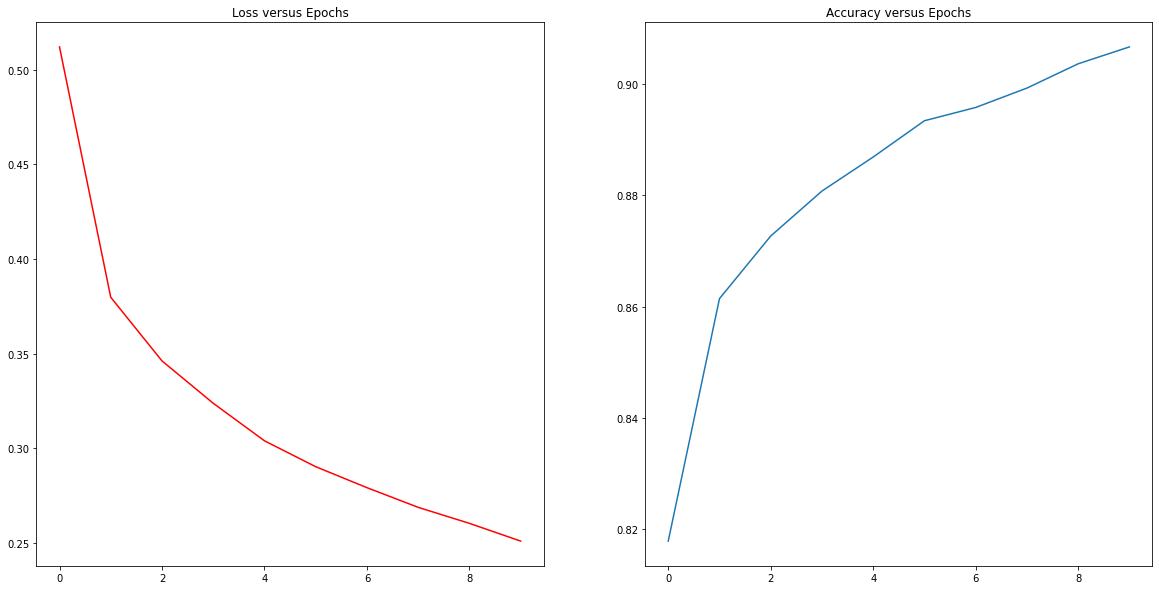

In [ ]:
train_model(model, epochs=10)
draw_chart(loss, acc)

## Evaluate and Inference

In [ ]:
# 1. Evaluate model performance on Test Set # If Training is good but Testing isn't good, then Train again.
model.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3805 - accuracy: 0.8660


[0.3804626762866974, 0.8659999966621399]

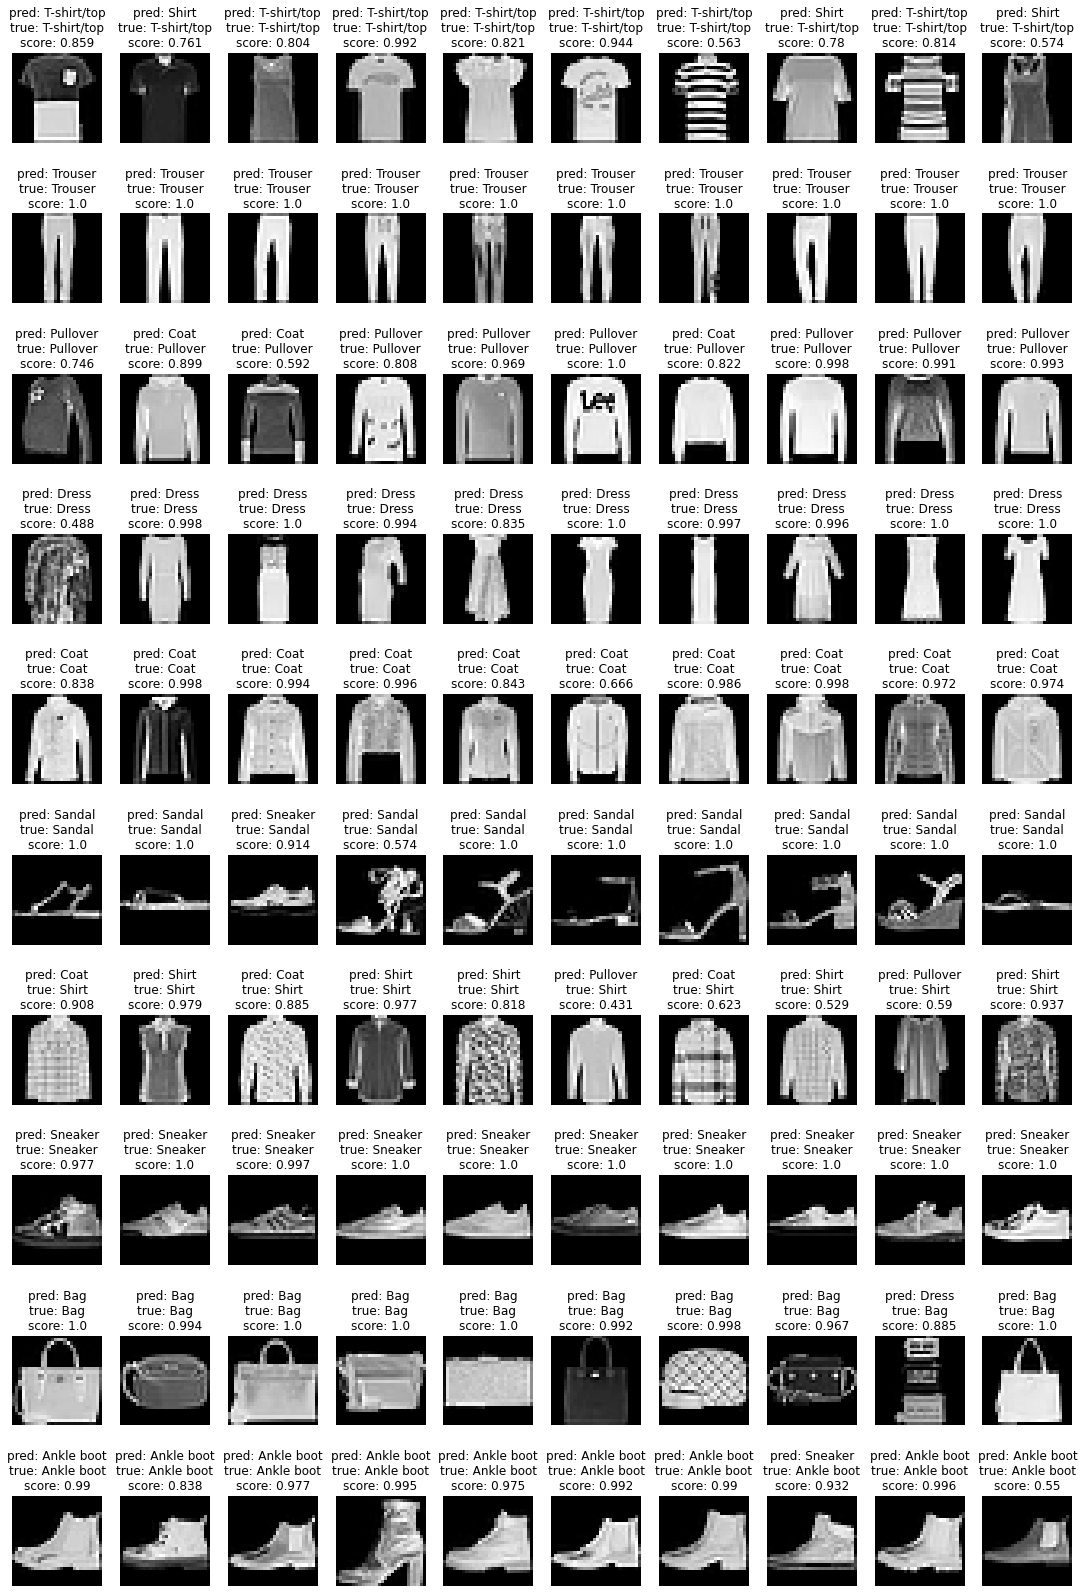

In [ ]:
fig, axs = plt.subplots(10,10)
fig.set_figheight(3 * 10 - 1)
fig.set_figwidth(2 * 10 - 1)
for i in range(10):
  targets = np.where(np.argmax(Y_test, axis=1) == i)[0]
  for j in range(10):
    axs[i][j].grid('off')
    axs[i][j].axis('off')
    target = np.random.choice(targets)
    temp = X_test[target]
    temp = temp[None,...]
    pred = model.predict(temp)
    axs[i][j].imshow(np.squeeze(temp), cmap='gray')
    axs[i][j].set_title('pred: {}\ntrue: {}\nscore: {:.3}'.format(
              class_names[np.argmax(pred)], 
              class_names[np.argmax(Y_test[target])], 
              np.max(pred)
    ))

# Save and Load Keras Model

In [ ]:
import os
MODEL_PATH = '/content/drive/My Drive/Colab Notebooks'
model.save(os.path.join(MODEL_PATH, 'my_model'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/my_model/assets


In [ ]:
from tensorflow.keras.models import load_model
import os
MODEL_PATH = '/content/drive/My Drive/Colab Notebooks'
load = load_model(os.path.join(MODEL_PATH, 'my_model'))
load.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3805 - accuracy: 0.8660


[0.3804626762866974, 0.8659999966621399]